<a href="https://colab.research.google.com/github/Philipof/PredictiveAnalytics/blob/master/candycrush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('candy_crush.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         90189 non-null  int64
 1   gate            90189 non-null  int64
 2   gamerounds_sum  90189 non-null  int64
 3   retention_day   90189 non-null  bool 
 4   retention_week  90189 non-null  bool 
dtypes: bool(2), int64(3)
memory usage: 2.2 MB


In [ ]:
df.head()

,user_id,gate,gamerounds_sum,retention_day,retention_week
0,116,30,3,False,False
1,337,30,38,True,False
2,377,50,165,True,False
3,483,50,1,False,False
4,488,50,179,True,True


In [ ]:
#Get counts of users allocated to each gate
counts = df['gate'].value_counts()
print(counts)

50    45489
30    44700
Name: gate, dtype: int64


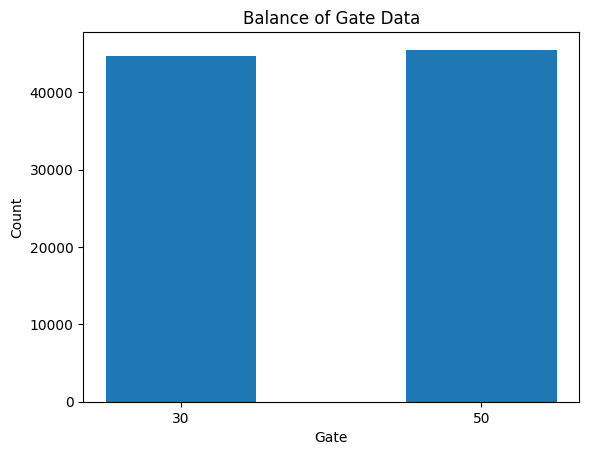

In [ ]:
#Create a bar chart
plt.bar(counts.index, counts.values, width = 10)

#Set the x-ticks to only show 30 and 50
plt.xticks([30, 50])

#Set the chart title and axes labels
plt.title('Balance of Gate Data')
plt.xlabel('Gate')
plt.ylabel('Count')

#Display the chart
plt.show()

In [ ]:
#Count values for retention_day
value_counts = df['retention_day'].value_counts()

print(value_counts)

False    50036
True     40153
Name: retention_day, dtype: int64


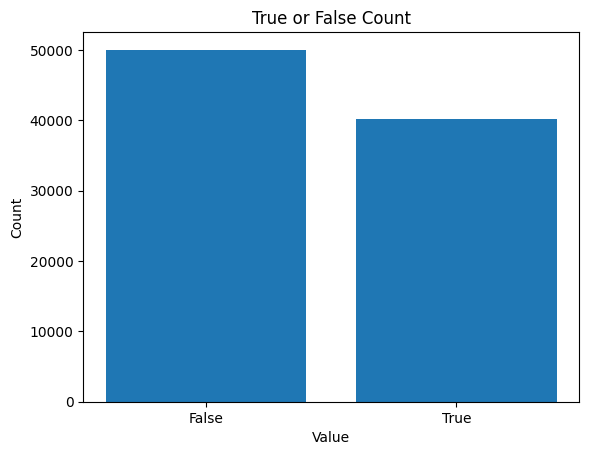

In [ ]:
plt.bar(value_counts.index.astype(str), value_counts.values, width=0.8)

#Set the chart title and axes labels
plt.title('True or False Count')
plt.xlabel('Value')
plt.ylabel('Count')

#Display the chart
plt.show()

In [ ]:
#Count values for retention_week
value_counts = df['retention_week'].value_counts()

print(value_counts)

False    73408
True     16781
Name: retention_week, dtype: int64


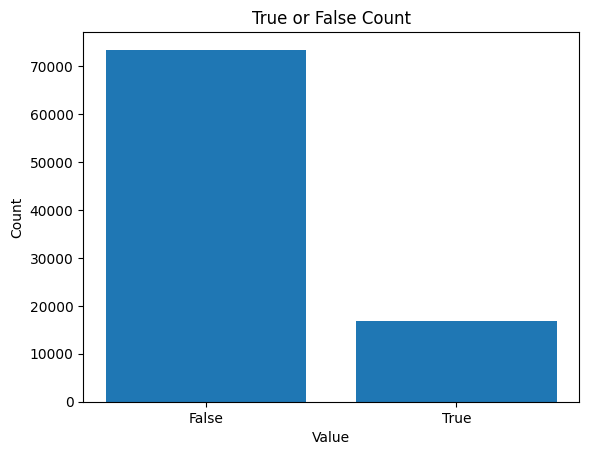

In [ ]:
plt.bar(value_counts.index.astype(str), value_counts.values, width=0.8)

#Set the chart title and axes labels
plt.title('True or False Count')
plt.xlabel('Value')
plt.ylabel('Count')

#Display the chart
plt.show()

In [ ]:
#Describe details of numerical columns
df.describe()

,user_id,gate,gamerounds_sum
count,9.018900e+04,90189.000000,90189.000000
mean,4.998412e+06,40.087483,51.872457
std,2.883286e+06,9.999673,195.050858
min,1.160000e+02,30.000000,0.000000
25%,2.512230e+06,30.000000,5.000000
50%,4.995815e+06,50.000000,16.000000
75%,7.496452e+06,50.000000,51.000000
max,9.999861e+06,50.000000,49854.000000


In [ ]:
#Generate 99th percentile 
percentile_99 = df['gamerounds_sum'].quantile(0.99)
print(percentile_99)

493.0


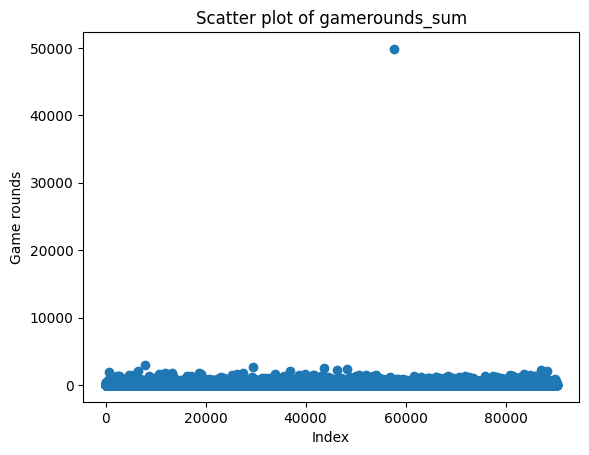

In [ ]:
#Display scatter-plot
x = df.index.values
y = df['gamerounds_sum']

plt.scatter(x, y)
plt.title('Scatter plot of gamerounds_sum')
plt.xlabel('Index')
plt.ylabel('Game rounds')
plt.show()

In [ ]:
#Find the number of time the rounds value was over 2000
mask = df['gamerounds_sum'] > 2000

#Count the number of True values in the mask
count = mask.sum()

#Print the count
print(f'Number of values over 2,000: {count}')

#Filter the DataFrame using the mask and print the rows
rows = df[mask]
print(rows)

Number of values over 2,000: 10
       user_id  gate  gamerounds_sum  retention_day  retention_week
6536    725080    50            2015           True            True
7912    871500    30            2961           True            True
29417  3271615    50            2640           True           False
36933  4090246    50            2124           True            True
43671  4832608    30            2438           True            True
46344  5133952    30            2251           True            True
48188  5346171    50            2294           True            True
57702  6390605    30           49854          False            True
87007  9640085    30            2156           True            True
88328  9791599    50            2063           True            True


In [ ]:
#Single out the outlier
outlier = df['gamerounds_sum'] > 40000

#Drop the outlier
df = df.drop(df[outlier].index)

In [ ]:
#Count how many users did not play after installing game
count_of_zeros = df['gamerounds_sum'].value_counts()[0]
print(count_of_zeros)

#Get rid of the columns
df = df[df['gamerounds_sum'] != 0]

3994


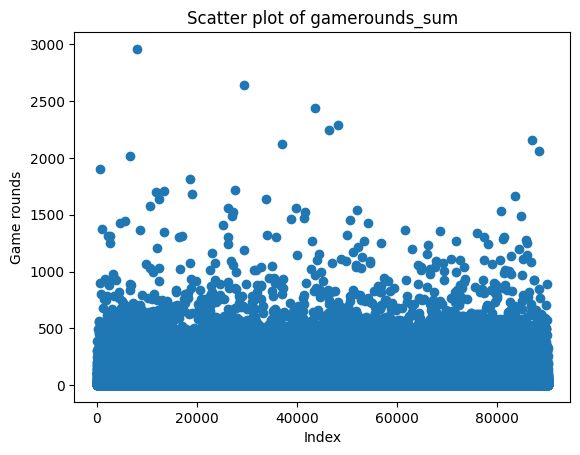

In [ ]:
#Display scatter-plot
x = df.index.values
y = df['gamerounds_sum']

plt.scatter(x, y)
plt.title('Scatter plot of gamerounds_sum')
plt.xlabel('Index')
plt.ylabel('Game rounds')
plt.show()

# **Game Rounds**

In [ ]:
#Get total rounds played
total_gamerounds = df['gamerounds_sum'].sum()
print(f"Total game rounds: {total_gamerounds}")

Total game rounds: 4628471


In [ ]:
#Get total for each gatw
gate_sum = df.groupby('gate')['gamerounds_sum'].sum()

#Calculate the difference between gate 30 and gate 50
diff = gate_sum[30] - gate_sum[50]


print('Gate 30 total game rounds:', gate_sum[30])
print('Gate 50 total game rounds:', gate_sum[50])
print('Difference:', diff)

Gate 30 total game rounds: 2294941
Gate 50 total game rounds: 2333530
Difference: -38589


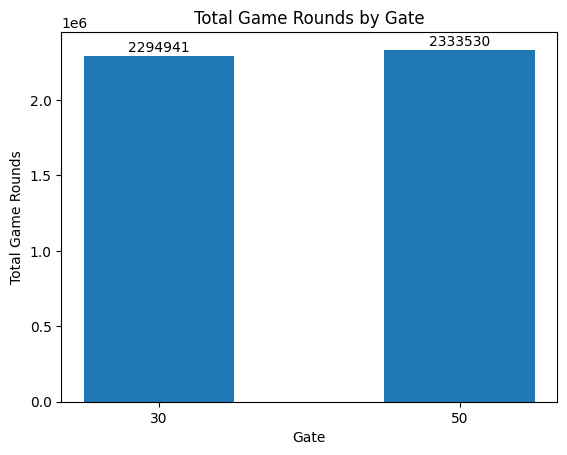

In [ ]:
#Create the bar chart with labels
fig, ax = plt.subplots()

#Plot the bars with the sums as labels
rects = ax.bar(gate_sum.index, gate_sum.values, width=10)
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+5000, gate_sum.values[i], ha='center', va='bottom')

#Set the x-ticks to only show 30 and 50
plt.xticks([30, 50])

#Set the chart title and axes labels
plt.title('Total Game Rounds by Gate')
plt.xlabel('Gate')
plt.ylabel('Total Game Rounds')

#Display the chart 
plt.show()

In [ ]:
#Calculate the mean rounds played for each gate
thirty_retention = df[df['gate']==30]['gamerounds_sum'].mean()
fifty_retention = df[df['gate']==50]['gamerounds_sum'].mean()

#Calculate the difference between the two groups
diff = fifty_retention - thirty_retention

print(f'Gate 30 average game rounds: {thirty_retention:.4}')
print(f'Gate 50 average game rounds: {fifty_retention:.4}')
print(f'Difference: {diff:.1}')

Gate 30 average game rounds: 53.67
Gate 50 average game rounds: 53.73
Difference: 0.06


In [ ]:
#Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(df[df['gate']==30]['gamerounds_sum'], df[df['gate']==50]['gamerounds_sum'])

#Calculate Lift
baseline = df[df['gate']==30]['gamerounds_sum'].mean()
lift = ((df[df['gate']==50]['gamerounds_sum'].mean() - baseline) / baseline)*100

print(f'Lift: {lift:.2f}%')
print(f't-statistic: {t_statistic:.3f}')
print(f'p-value: {p_value:4f}')

Lift: 0.11%
t-statistic: -0.085
p-value: 0.932125


# **One Day Retention**

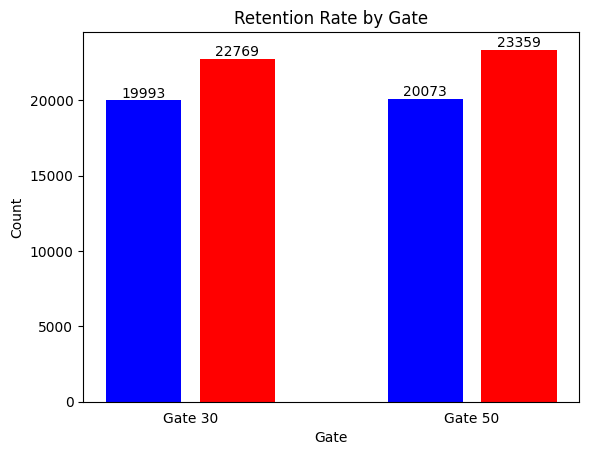

In [ ]:
#Count the number of True and False values for retention_day for each gate
counts = df.groupby(['gate', 'retention_day'])['retention_day'].count()

#Extract the counts for each category
gate30_true_count = counts[30][True]
gate30_false_count = counts[30][False]
gate50_true_count = counts[50][True]
gate50_false_count = counts[50][False]

#Create a bar chart
plt.bar([1,2,4,5], [gate30_true_count, gate30_false_count, gate50_true_count, gate50_false_count], width = 0.8, color=['blue', 'red', 'blue', 'red'])

#Set the x-ticks and labels
plt.xticks([1.5, 4.5], ['Gate 30', 'Gate 50'])
plt.gca().xaxis.set_tick_params(width=0)

#Set the chart title and axes labels
plt.title('Retention Rate by Gate')
plt.xlabel('Gate')
plt.ylabel('Count')

#Add labels to the bars
plt.text(1, gate30_true_count + 200, str(gate30_true_count), ha='center')
plt.text(2, gate30_false_count + 200, str(gate30_false_count), ha='center')
plt.text(4, gate50_true_count + 200, str(gate50_true_count), ha='center')
plt.text(5, gate50_false_count + 200, str(gate50_false_count), ha='center')

#Display the chart
plt.show()

In [ ]:
#Calculate the mean retention for each group
thirty_retention = df[df['gate']==30]['retention_day'].mean()
fifty_retention = df[df['gate']==50]['retention_day'].mean()

#Calculate the difference between the two groups
diff = fifty_retention - thirty_retention

print(f'Gate 30 One-day Retention: {thirty_retention:.4%}')
print(f'Gate 50 One-day Retention: {fifty_retention:.4%}')
print(f'Difference: {diff:.4%}')

Gate 30 One-day Retention: 46.7541%
Gate 50 One-day Retention: 46.2171%
Difference: -0.5371%


In [ ]:
#Perform a t-test to compare the two groups
t_statistic, p_value = ttest_ind(df[df['gate']==30]['retention_day'], df[df['gate']==50]['retention_day'])

#Calculate Lift
baseline = df[df['gate']==30]['retention_day'].mean()
lift = ((df[df['gate']==50]['retention_day'].mean() - baseline) / baseline)*100

print(f'Lift: {lift:.2f}%')
print(f't-statistic: {t_statistic:.3f}')
print(f'p-value: {p_value:4f}')

Lift: -1.15%
t-statistic: 1.581
p-value: 0.113975


# **One Week Retnention**

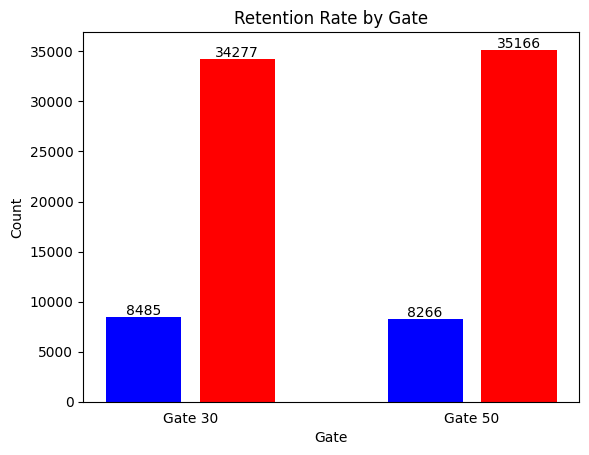

In [ ]:
#Count the number of True and False values for retention_week for each gate
counts = df.groupby(['gate', 'retention_week'])['retention_week'].count()

#Extract the counts for each category
gate30_true_count = counts[30][True]
gate30_false_count = counts[30][False]
gate50_true_count = counts[50][True]
gate50_false_count = counts[50][False]

#Create a bar chart
plt.bar([1,2,4,5], [gate30_true_count, gate30_false_count, gate50_true_count, gate50_false_count], width = 0.8, color=['blue', 'red', 'blue', 'red'])

#Set the x-ticks and labels
plt.xticks([1.5, 4.5], ['Gate 30', 'Gate 50'])
plt.gca().xaxis.set_tick_params(width=0)

#Set the chart title and axes labels
plt.title('Retention Rate by Gate')
plt.xlabel('Gate')
plt.ylabel('Count')

#Add labels to the bars
plt.text(1, gate30_true_count + 200, str(gate30_true_count), ha='center')
plt.text(2, gate30_false_count + 200, str(gate30_false_count), ha='center')
plt.text(4, gate50_true_count + 200, str(gate50_true_count), ha='center')
plt.text(5, gate50_false_count + 200, str(gate50_false_count), ha='center')

#Display the chart
plt.show()

In [ ]:
#Calculate one-week retention for each group
thirty_retention = df[df['gate']==30]['retention_week'].mean()
fifty_retention = df[df['gate']==50]['retention_week'].mean()

#Calculate the difference between the two groups
diff = fifty_retention - thirty_retention

print(f'Gate 30 One-week Retention: {thirty_retention:.4%}')
print(f'Gate 50 One-week Retention: {fifty_retention:.4%}')
print(f'Difference: {diff:.4%}')

Gate 30 One-week Retention: 19.8424%
Gate 50 One-week Retention: 19.0321%
Difference: -0.8103%


In [ ]:
#Perform a t-test to compare the two groups
t_statistic, p_value = ttest_ind(df[df['gate']==30]['retention_week'], df[df['gate']==50]['retention_week'])

#Calculate Lift
baseline = df[df['gate']==30]['retention_week'].mean()
lift = ((df[df['gate']==50]['retention_week'].mean() - baseline) / baseline)*100

print(f'Lift: {lift:.2f}%')
print(f't-statistic: {t_statistic:.3f}')
print(f'p-value: {p_value:4f}')

Lift: -4.08%
t-statistic: 3.006
p-value: 0.002646
